<a href="https://colab.research.google.com/github/Berryl-Otieno22/Berryl-Otieno22/blob/main/Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# New working dataset URL
url = 'https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv'
df = pd.read_csv(url)
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              200 non-null    int64  
 1    Height(Inches)"   200 non-null    float64
 2    "Weight(Pounds)"  200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [ ]:
df.columns = df.columns.str.strip().str.replace('"', '')
df.columns

Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [ ]:
# Convert height from inches to meters
df['Height_m'] = df['Height(Inches)'] * 0.0254

# Convert weight from pounds to kilograms
df['Weight_kg'] = df['Weight(Pounds)'] * 0.453592

# Calculate BMI
df['BMI'] = df['Weight_kg'] / (df['Height_m'] ** 2)

# Display the first few rows
df[['Height(Inches)', 'Weight(Pounds)', 'BMI']].head()

,Height(Inches),Weight(Pounds),BMI
0,65.78,112.99,18.359051
1,71.52,136.49,18.760473
2,69.40,153.03,22.338581
3,68.22,142.34,21.503120
4,67.79,144.30,22.076642


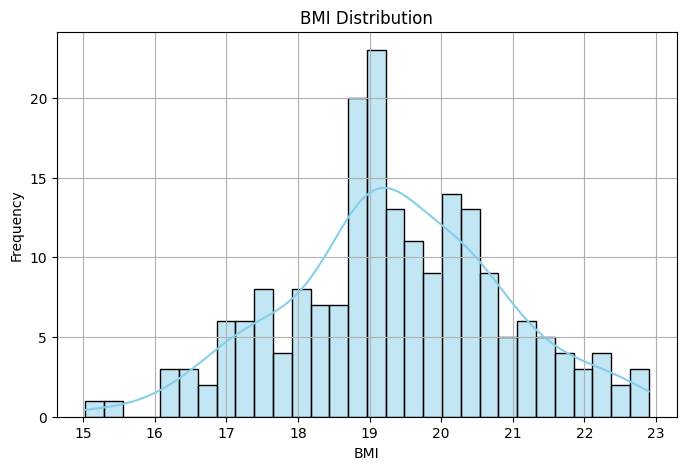

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=30, kde=True, color='skyblue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

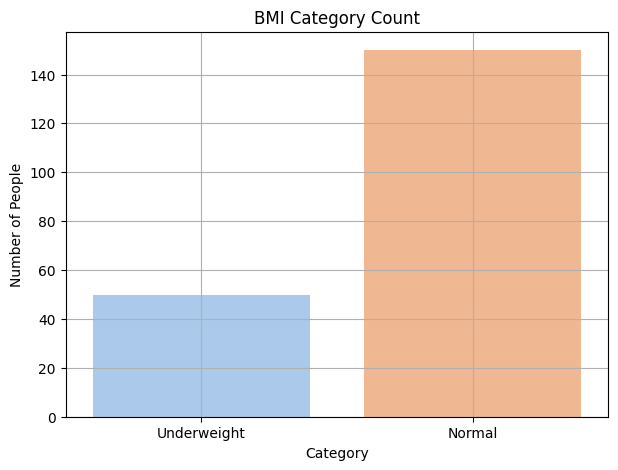

In [ ]:
# Define BMI categories
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(classify_bmi)

# Count plot of BMI categories
plt.figure(figsize=(7,5))
sns.countplot(x='BMI_Category', hue='BMI_Category', data=df, palette='pastel', legend=False)
plt.title('BMI Category Count')
plt.xlabel('Category')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

/tmp/ipython-input-10-3170743926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BMI_Category', y='BMI', data=avg_bmi, palette='muted')


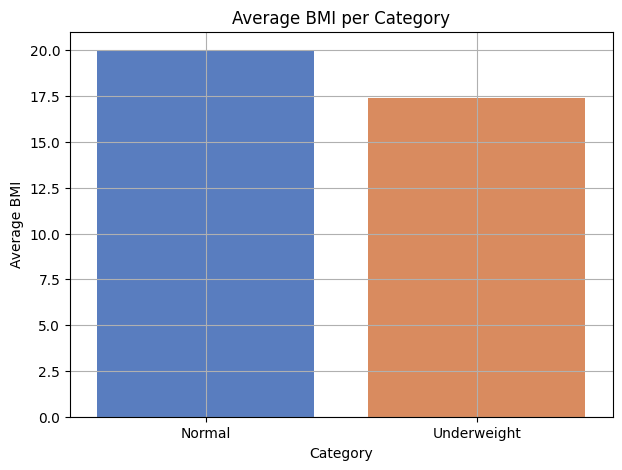

In [ ]:
avg_bmi = df.groupby('BMI_Category')['BMI'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x='BMI_Category', y='BMI', data=avg_bmi, palette='muted')
plt.title('Average BMI per Category')
plt.ylabel('Average BMI')
plt.xlabel('Category')
plt.grid(True)
plt.show()

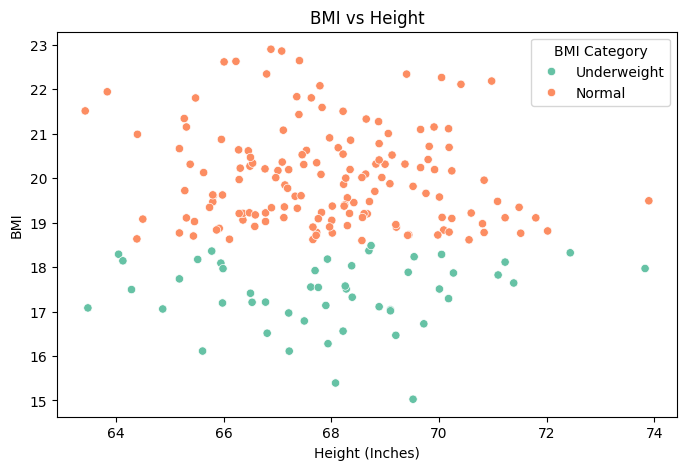

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Height(Inches)', y='BMI', hue='BMI_Category', data=df, palette='Set2')
plt.title('BMI vs Height')
plt.xlabel('Height (Inches)')
plt.ylabel('BMI')
plt.legend(title='BMI Category')
plt.show()

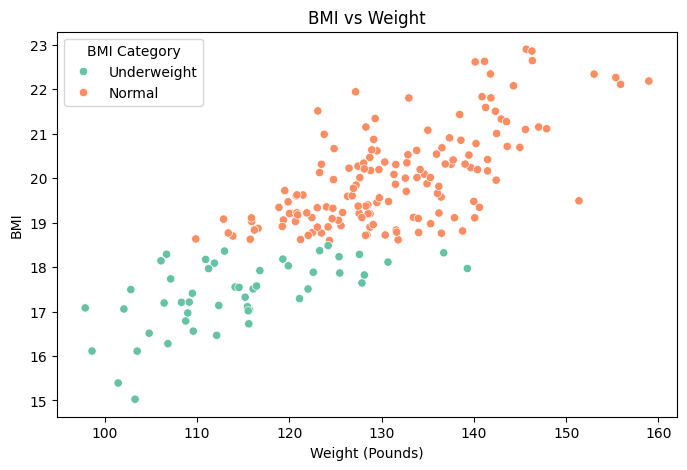

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Weight(Pounds)', y='BMI', hue='BMI_Category', data=df, palette='Set2')
plt.title('BMI vs Weight')
plt.xlabel('Weight (Pounds)')
plt.ylabel('BMI')
plt.legend(title='BMI Category')
plt.show()

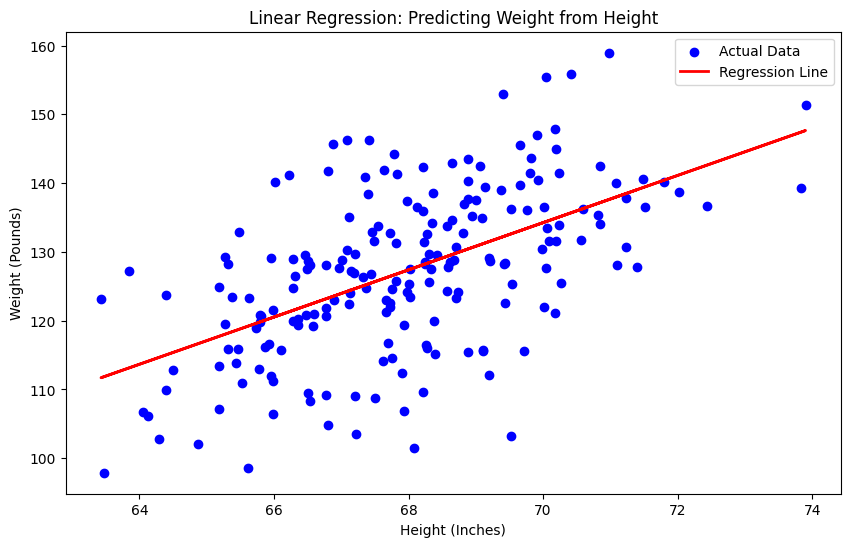

In [ ]:

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

url = 'https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv'
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.replace('"', '')
df.columns


# Define input and output
X = df[['Height(Inches)']]   # Input must be a 2D array
y = df['Weight(Pounds)']     # Output (target)

# Create and train model
model = LinearRegression()
model.fit(X, y)

# Predict values
predicted = model.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predicted, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.title('Linear Regression: Predicting Weight from Height')
plt.legend()
plt.show()

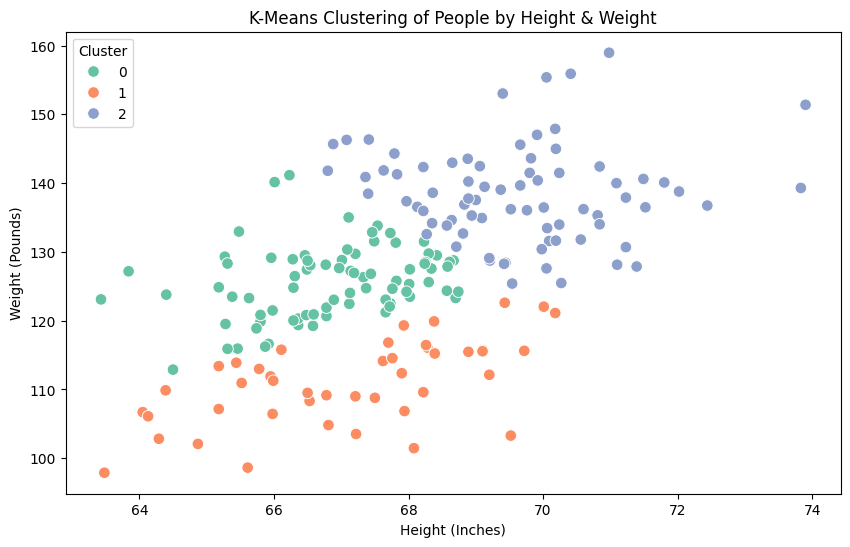

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


df['BMI'] = df['Weight(Pounds)'] / (df['Height(Inches)'] * 0.0254) ** 2

# We'll use height, weight, and BMI
features = df[['Height(Inches)', 'Weight(Pounds)', 'BMI']]

# Standardize the features
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Create KMeans model (try 3 clusters to start)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

# Visualize clusters using Height & Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Height(Inches)',
    y='Weight(Pounds)',
    hue='Cluster',
    palette='Set2',
    data=df,
    s=70
)
plt.title('K-Means Clustering of People by Height & Weight')
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.legend(title='Cluster')
plt.show()